Importing Liberaries:

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import os, sys
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image
import splitfolders
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers


import numpy as np
import pandas as pd

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import pydot
import glob 
import matplotlib.pyplot as plotter

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [30]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.0
Num GPUs Available:  1


In [31]:
dataset_path = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/Data'
# path = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/rescal128'
path = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/rescal224'

In [32]:
df = pd.read_csv(dataset_path + "/data.csv")
df.head()

,Unnamed: 0,path,label
0,0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise
1,1,Surprise/cropped_emotions.100096~12fffff.png,Surprise
2,2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise
3,3,Surprise/cropped_emotions.260779~12fffff.png,Surprise
4,4,Surprise/cropped_emotions.263616~12fffff.png,Surprise


Rescaling all images and saving them:
We defiend a function which resizes images within subfolders of the dataset, preserving their original names.

Args:
dataset_path (str): Path to the dataset directory.
output_path (str): Path to the output directory for resized images.
target_size (tuple): Target size for resized images (width, height).


Splitting the Dataset into folders:

 Preprocess Your Dataset:

# 2 Sets #

In [34]:
train_dir = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/rescal224 - split 2/train'
val_dir = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/rescal224 - split 2/val'

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip = True, vertical_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=36,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=36,
    class_mode='categorical'
)


emotion_labels = {v: k for k, v in train_generator.class_indices.items()}
print(emotion_labels)

Found 11397 images belonging to 5 classes.
Found 2851 images belonging to 5 classes.
{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}


Create a Sequential model and add layers:

In [40]:
# # Arbitrary Architecture 1:

# # Better coding (edit params):

# num_classes = 5
# input_shape = (224, 224, 3)

# model = tf.keras.Sequential([
#     tfl.Input(shape=input_shape),
    
#     tfl.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),
    
#     tfl.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.GlobalAveragePooling2D(),
#     tfl.Dense(128, activation='relu'),
#     tfl.Dropout(0.5),
#     tfl.Flatten(),
#     tfl.Dense(num_classes, activation='softmax')
# ])


In [41]:
# # Arbitrary Architecture 2:

# # Better coding (edit params):

# num_classes = 5
# input_shape = (224, 224, 3)

# model = tf.keras.Sequential([
#     tfl.Input(shape=input_shape),
    
#     tfl.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),
    
#     tfl.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
#     tfl.MaxPool2D(pool_size=(2, 2)),

#     tfl.Flatten(),

#     tfl.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    
#     tfl.Dropout(0.5),
    
#     tfl.Dense(num_classes, activation='softmax')
# ])


In [42]:
# Arbitrary Architecture 3:

# Better coding (edit params):

num_classes = 5
input_shape = (224, 224, 3)

model = tf.keras.Sequential([
    tfl.Input(shape=input_shape),
    
    tfl.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(),  
    
    tfl.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(),  
    
    tfl.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(),  
    
    tfl.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(),  
    
    tfl.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(),  
    
    tfl.Flatten(),

    tfl.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),

    tfl.Dropout(0.5),
    
    tfl.Dense(num_classes, activation='softmax')
])


Compile the Model
Choose an optimizer (e.g., Adam) and loss function (e.g., categorical cross-entropy):

In [48]:
model.compile(optimizer ='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                      

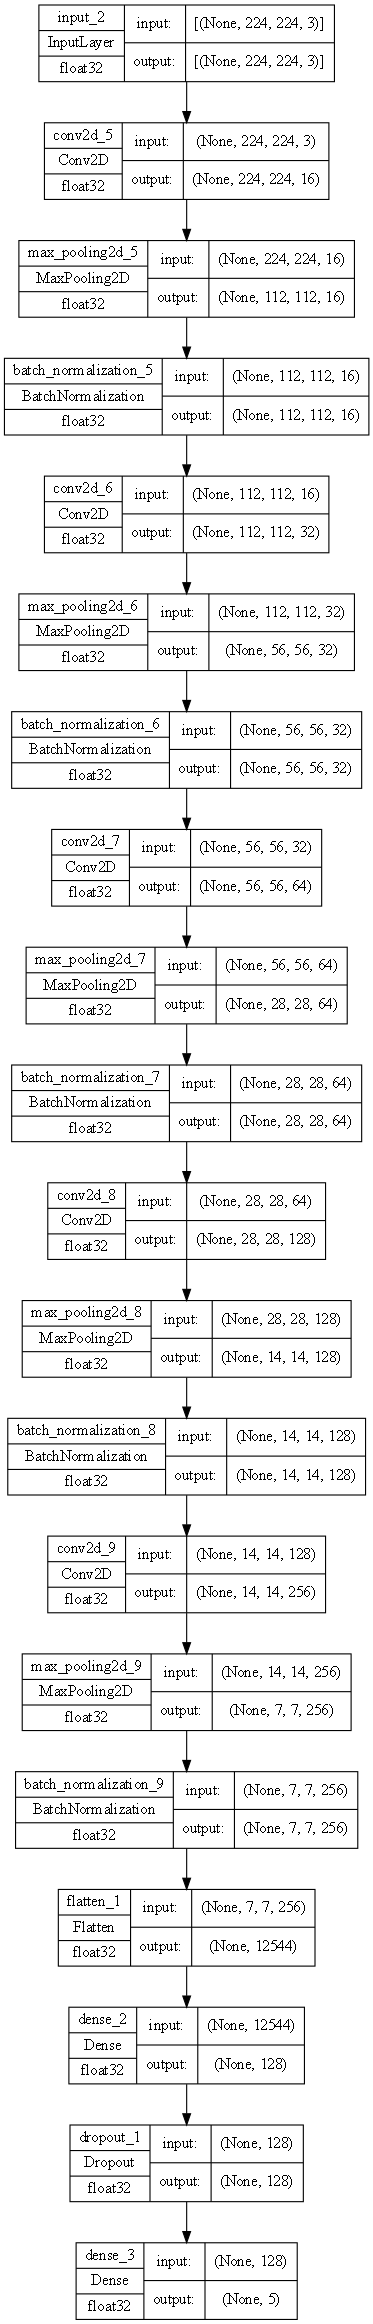

In [63]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [49]:
# Verify my validation_generator is working:

for X_batch, y_batch in val_generator:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    break  # Print only one batch


X_batch shape: (36, 224, 224, 3)
y_batch shape: (36, 5)


In [50]:
len(val_generator)

80

In [51]:
num_validation_batches = len(train_generator)* 2
print("Number of validation batches:", num_validation_batches)

Number of validation batches: 634


In [58]:
# Define a checkpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Define an early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [59]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint,early_stopping]
    )

Epoch 1/50
317/317 [==============================] - 28s 86ms/step - loss: 0.6946 - accuracy: 0.8541 - val_loss: 0.9974 - val_accuracy: 0.7692
Epoch 2/50
317/317 [==============================] - 28s 87ms/step - loss: 0.7013 - accuracy: 0.8584 - val_loss: 0.9914 - val_accuracy: 0.7808
Epoch 3/50
317/317 [==============================] - 27s 87ms/step - loss: 0.6677 - accuracy: 0.8644 - val_loss: 1.0146 - val_accuracy: 0.7657
Epoch 4/50
317/317 [==============================] - 28s 88ms/step - loss: 0.6749 - accuracy: 0.8643 - val_loss: 1.0508 - val_accuracy: 0.7524
Epoch 5/50
317/317 [==============================] - 27s 87ms/step - loss: 0.6774 - accuracy: 0.8612 - val_loss: 1.1017 - val_accuracy: 0.7334
Epoch 6/50
317/317 [==============================] - 27s 86ms/step - loss: 0.6738 - accuracy: 0.8687 - val_loss: 1.0157 - val_accuracy: 0.7562
Epoch 7/50
317/317 [==============================] - 27s 86ms/step - loss: 0.6739 - accuracy: 0.8635 - val_loss: 1.0935 - val_accuracy:

In [53]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

80/80 [==============================] - 5s 63ms/step - loss: 1.0779 - accuracy: 0.7432
Test accuracy: 0.7432479858398438


In [54]:
model.save('custom_model.keras')

In [74]:
train_data_dir = dataset_path
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

for images, labels in train.take(1):
    print(images.shape)  
    print(labels.shape)  

Found 15453 files belonging to 1 classes.
Using 12363 files for training.
Found 15453 files belonging to 1 classes.
Using 3090 files for validation.
(64, 224, 224, 3)
(64,)


In [56]:
hist_=pd.DataFrame(history.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,3.211942,0.288409,2.082208,0.282708
1,1.687557,0.307713,1.508794,0.343388
2,1.617184,0.334649,1.461553,0.383725
3,1.590900,0.374046,1.576917,0.400210
4,1.463914,0.431254,1.606776,0.331463
5,1.393799,0.459595,1.343410,0.489302
6,1.350854,0.493726,1.391388,0.514556
7,1.310671,0.532684,1.262544,0.600842
8,1.282655,0.571993,1.237750,0.609611
9,1.222663,0.614372,1.155307,0.673448


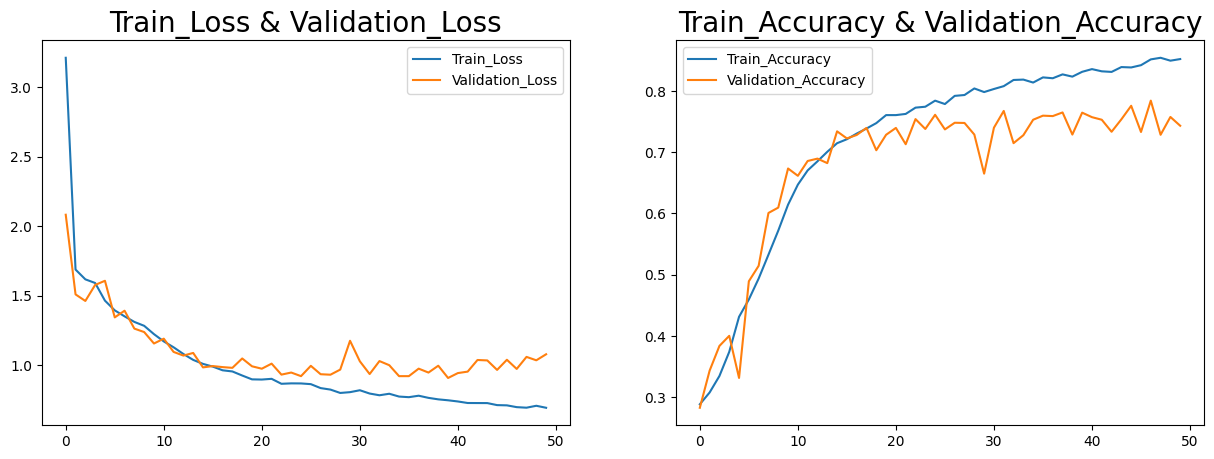

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()